## Creating SQLite database

In [1]:
import sqlite3 

conn = sqlite3.connect("sales.db")
cursor = conn.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS sales_data( 
id INTEGER PRIMARY KEY,
date TEXT, 
product TEXT,
quantity INTEGER, 
price REAL
)
''')
conn.commit()

## Inserting data into the table

In [2]:
sample_data = [
    ('2024-06-01', 'Laptop', 3, 899.99),
    ('2024-06-01', 'Tablet', 7, 299.50), 
    ('2024-06-02', 'Monitor', 2, 199.99),
    ('2024-06-02', 'Keyboard', 10, 49.99),
    ('2024-06-03', 'Laptop', 1, 899.99)
]

cursor.executemany('''
INSERT INTO sales_data ( date, product, quantity, price)
VALUES (?, ?, ?, ?)
''', sample_data)

conn.commit()

## Using SQL queries and pandas in the database

In [3]:
import pandas as pd

query = "SELECT * FROM sales_data WHERE quantity > 2;"
df = pd.read_sql(query, conn)
print(df)

   id        date   product  quantity   price
0   1  2024-06-01    Laptop         3  899.99
1   2  2024-06-01    Tablet         7  299.50
2   4  2024-06-02  Keyboard        10   49.99


## Grouping and visualizing the data

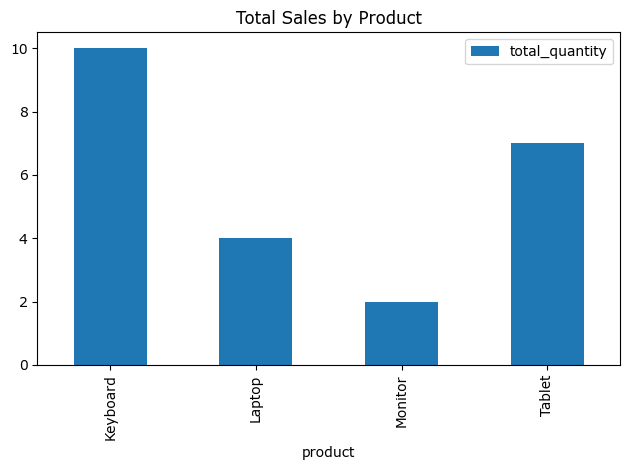

In [4]:
summary_query = '''
SELECT product, SUM(quantity) AS total_quantity
FROM sales_data
GROUP BY product
'''

summary_df = pd.read_sql(summary_query, conn)

import matplotlib.pyplot as plt

summary_df.plot(kind='bar', x='product', y='total_quantity', title='Total Sales by Product')
plt.tight_layout()
plt.show()